## Well basics

Some preliminaries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import welly
welly.__version__

'0.1.0'

In [2]:
import os
env = %env

## Load well from CSV

This does not do a lot yet. This is the first step in trying to make a CSV constructor.

It may not be possible to generalize this in a sensible way.

In [3]:
import csv
fname = '/Users/matt/Dropbox/dev/recipes/data/Nova_Scotia_wells_2015.csv'
reader = csv.DictReader(open(fname))

wells = []

for line in reader:
    params = {'header': {},
              'location': {},
             }
    
    for key, value in line.items():
        sect, item = key.split('.')
        params[sect][item] = value
        
    # Deal with surface location nonsense.
    
    # First the numerics.
    try:
        lat = float(params['location'].get('latitude'))
        lon = float(params['location'].get('longitude'))
        x = float(params['location'].get('x'))
        y = float(params['location'].get('y'))
    except:
        lat, lon = 0, 0
        x, y = 0, 0

    # Then the strings.
    datum = params['location'].get('datum')  # Empty string if missing
    utm = params['location'].get('datum')    # Empty string if missing
    
    # STRICT RULES
    # Either a well location has what it needs, or it doesn't. 
    
    # If we have (lat, lon) then chuck everything else out.
    if lat and lon:
        del params['location']['x']
        del params['location']['y']
        del params['location']['utm']
        if not datum:
            del params['location']['latitude']
            del params['location']['longitude']
            
    # Otherwise, keep fully qualified (x, y)s
    else:
        del params['location']['latitude']
        del params['location']['longitude']
        if (not x and y) or (not datum) or (not utm):
            del params['location']['x']
            del params['location']['y']
            del params['location']['datum']
            del params['location']['utm']

    # Build the well and add it to the list.
    h = welly.Header(params['header'])
    l = welly.Location(params['location'])
    w = welly.Well({'header': h, 'location': l})
    wells.append(w)

In [4]:
wells[4]

## Save well to SHP

Just one, you'd loop to do many.

In [5]:
# You should really add a CRS, though you can make a Shapefile without one.

In [6]:
import fiona
from fiona import crs
from shapely.geometry import Point, LineString, mapping

point_schema = {'geometry': 'Point',
                'properties': {'name': 'str',
                               'uwi': 'str',
                               'td': 'int'
                               }
                }

fname = 'well.shp'

with fiona.open(fname, "w",
                driver="ESRI Shapefile",
                crs=w.crs,
                schema=point_schema) as f:

    for w in wells:
        
        
    
        p = Point(w.location.latitude, w.location.longitude)

        f.write({'geometry': mapping(p),
                 'properties': {'name': filebase,
                                'uwi': path,
                                'td': i}
                 })

AttributeError: 'Well' object has no attribute 'crs'

## Load a well from LAS

Use the `from_las()` method to load a well by passing a filename as a `str`. 

This is really just a wrapper for `lasio` but instantiates a `Header`, `Curve`s, etc.

In [7]:
from welly import Well

In [8]:
w = Well.from_las('P-129_out.LAS')

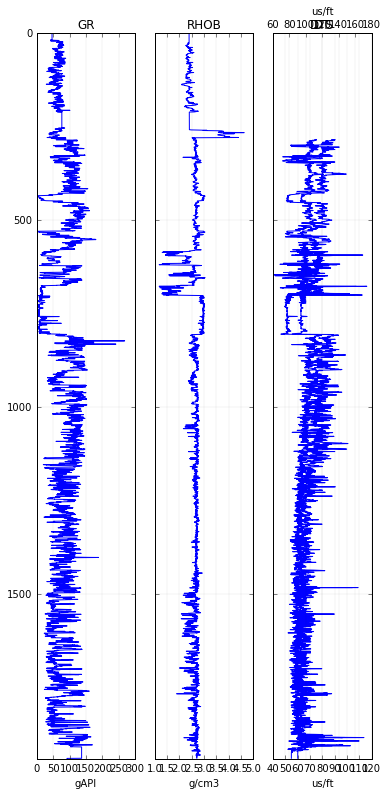

In [9]:
tracks = ['GR', 'RHOB', ['DT', 'DTS']]
w.plot(tracks=tracks)

## Not implemented yet

PUT WISHED-FOR APIS HERE.